In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("/plotting/my_style.mplstyle")
from helper_functions import func_muprime_max
from helper_functions import func_muprime_min


In [3]:
ntn_105 = np.loadtxt("/Users/evazlimen/downloads/ntn=10^5.csv", delimiter =",")
ntn_106 = np.loadtxt("/Users/evazlimen/downloads/ntn=10^6.csv", delimiter =",")

In [5]:
def tau_ratio_1(j,beta, muprime):
    tau_ratio_1 = ((muprime*np.sqrt(3)*(j+1)**(3/2)*beta)/(j))**(2/3)
    return tau_ratio_1

def tau_ratio_2(j,beta, muprime):
    tau_ratio_2 = ((muprime*8*np.sqrt(3)*(j+1)**(3/2)*beta)/(j**2))**(2/3)
    return tau_ratio_2

In [6]:
"""
1: escape
2: finite libration
3: damped resoance
4: never caught
"""
colorlist = ["#3690c0", "#810f7c", "#e7298a", "white"]
print(colorlist[0])

#3690c0


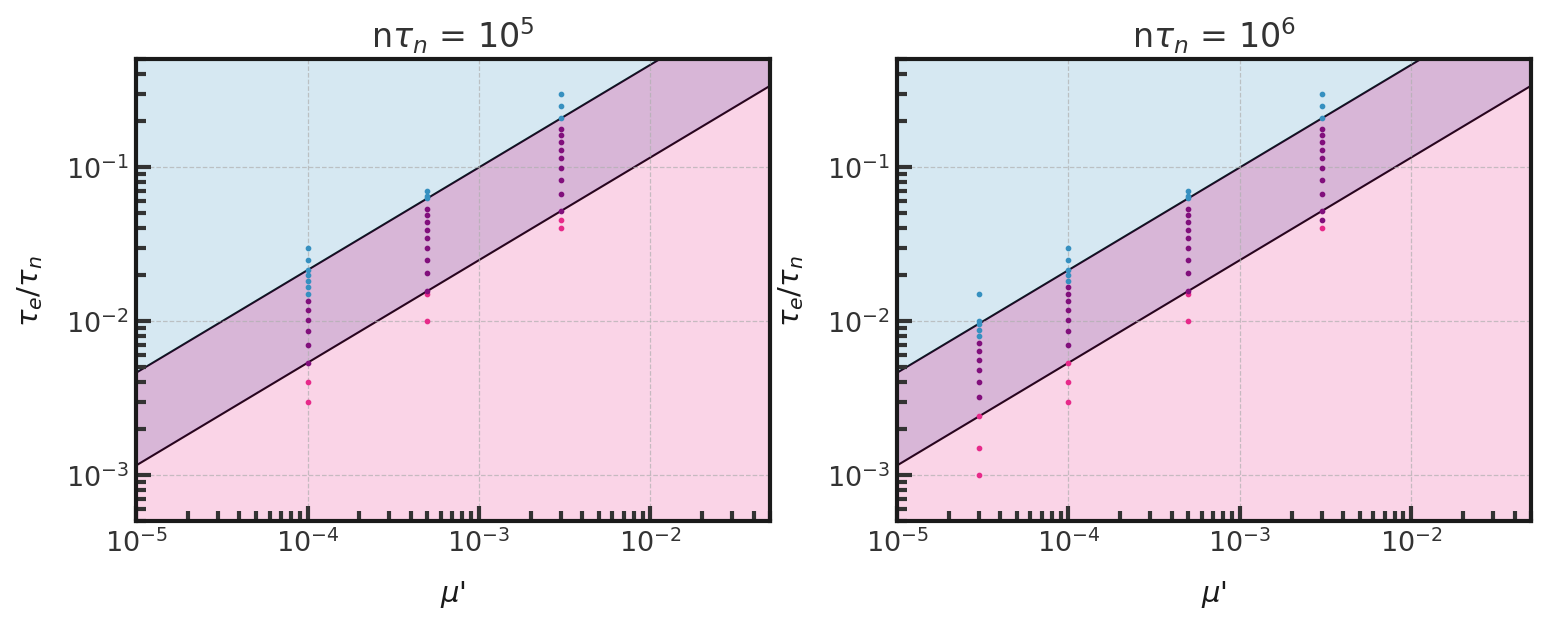

In [36]:
j = 1
beta = 0.8*j
muprime = np.linspace(1e-6, 5e-2, num = 1000)
xmin = 1e-5
xmax = 5e-2
ymin = 5e-4
ymax = .5
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.plot(muprime, tau_ratio_1(j,beta,muprime), zorder = 0, color = "black", lw = 1)
ax1.fill_between( x= muprime, y1= tau_ratio_1(j,beta,muprime),alpha= 0.2)
ax1.plot(muprime, tau_ratio_2(j,beta,muprime), color = "black", lw = 1, zorder = 0)
ax1.fill_between(x= muprime, y1= tau_ratio_2(j,beta,muprime), y2 = tau_ratio_1(j,beta,muprime), alpha= 0.3)
ax1.fill_between(x= muprime, y1 = 100, y2= tau_ratio_2(j,beta,muprime), alpha= 0.2)
ax1.set_title(r"n$\tau_{n}$ = 10$^{5}$")



#ax1.annotate("Damped to stable point",( .00005,.001))
#ax1.annotate("Finite amplitude libration",( .0000013,.00035), rotation = 33.5, size = 8)
#ax1.annotate("Escape",( .00001, .1))
ax1.set_ylabel(r"$\tau_{e}/\tau_{n}$")
ax1.set_xlabel(r"$\mu$'")

for i in range(len(ntn_105.T[0])):
    if int(ntn_105.T[2][i]) !=4:
        ax1.scatter(ntn_105.T[0][i], ntn_105.T[1][i], color = colorlist[int(ntn_105.T[2][i])-1], s = 3, zorder=10)

ax1.set_xlim(xmin,xmax)
#ax1.set_xlim(1e-6,.001)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(ymin, ymax)
"""
plot 2
"""
ax2.plot(muprime, tau_ratio_1(j,beta,muprime), zorder = 0, color = "black", lw = 1)
ax2.fill_between( x= muprime, y1= tau_ratio_1(j,beta,muprime),alpha= 0.2)
ax2.plot(muprime, tau_ratio_2(j,beta,muprime), color = "black", lw = 1, zorder = 0)
ax2.fill_between(x= muprime, y1= tau_ratio_2(j,beta,muprime), y2 = tau_ratio_1(j,beta,muprime), alpha= 0.3)
ax2.fill_between(x= muprime, y1 = 100, y2= tau_ratio_2(j,beta,muprime), alpha= 0.2)




#ax2.annotate("Damped to stable point",( .00005,.001))
#ax2.annotate("Finite amplitude libration",( .0000013,.00035), rotation = 33.5, size = 8)
#ax2.annotate("Escape",( .00001, .1))
ax2.set_ylabel(r"$\tau_{e}/\tau_{n}$")
ax2.set_xlabel(r"$\mu$'")
ax2.set_title(r"n$\tau_{n}$ = 10$^{6}$")

for i in range(len(ntn_106.T[0])):
    ax2.scatter(ntn_106.T[0][i], ntn_106.T[1][i], color = colorlist[int(ntn_106.T[2][i])-1], s = 3, zorder=10)


ax2.set_xlim(xmin,xmax)
#ax2.set_xlim(-1e-6,.0002)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(ymin,ymax)



plt.show()

In [39]:
#want to compute the difference between the theoretically predicted crossover to escape and numerically calculated escape:
print(np.where(ntn_105.T[2]==2))
np.where(ntn_105.T[2]==3)

(array([16, 17, 18, 19, 20, 21, 31, 32, 33, 34, 35, 36, 37, 38, 39, 45, 46,
       47, 48, 49, 50, 51, 52, 53]),)


(array([14, 15, 29, 30, 43, 44]),)

In [89]:
escape_vals = np.where(ntn_105.T[2]==3) #where the integration shows the particle has escaped
finite_vals = np.where(ntn_105.T[2]==2) #where the integration shows the particle is in a finite libration
testvals = []
for i in range(len(escape_vals[0])): #for every point where the particle has escaped
    next = escape_vals[0][i]+1 #we expect that the crossover will occur when the list goes 3 3 3 --> 2, so the next number in the list is 2
    for j in range(len(finite_vals[0])): #search for 2
        if next == finite_vals[0][j]:
            testvals.append(next)


escape_vals_2 = np.where(ntn_106.T[2]==3) #where the integration shows the particle has escaped
finite_vals_2 = np.where(ntn_106.T[2]==2) #where the integration shows the particle is in a finite libration
testvals_2 = []
for i in range(len(escape_vals_2[0])): #for every point where the particle has escaped
    next_2 = escape_vals_2[0][i]+1 #we expect that the crossover will occur when the list goes 3 3 3 --> 2, so the next number in the list is 2
    for j in range(len(finite_vals_2[0])): #search for 2
        if next_2 == finite_vals_2[0][j]:
            testvals_2.append(next_2)

In [98]:
differences = []
mus = []
for i in testvals:
    muprime_data = ntn_105.T[0][i]
    mus.append(muprime_data)
    tau_predicted = tau_ratio_2(j, beta, muprime_data)
    tau_actual = ntn_105.T[1][i]
    difference = tau_predicted-tau_actual
    differences.append(difference)

differences_2 = []
mus_2 = []
for i in testvals_2:
    muprime_data = ntn_106.T[0][i]
    mus_2.append(muprime_data)
    tau_predicted = tau_ratio_2(j, beta, muprime_data)
    tau_actual = ntn_106.T[1][i]
    difference = tau_predicted-tau_actual
    differences_2.append(difference)

Text(0.5, 0, "$\\mu$'")

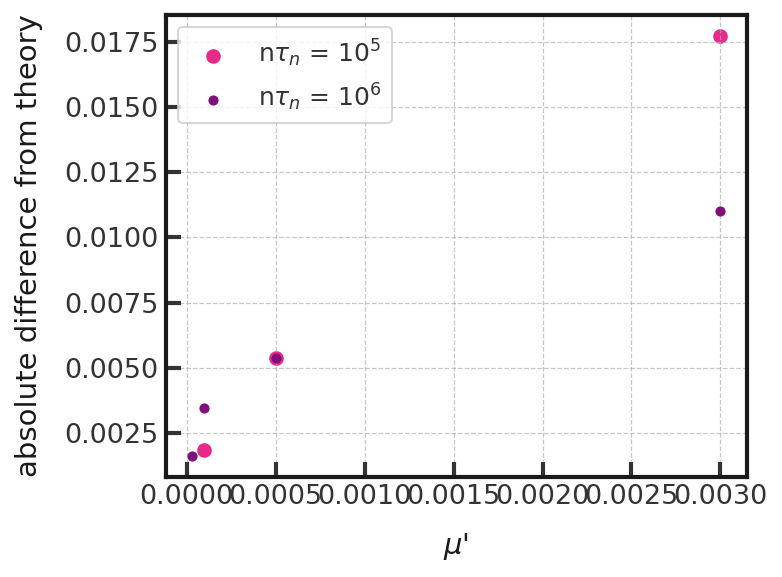

In [121]:
plt.scatter(mus,abs(np.asarray(differences)), label = r"n$\tau_{n}$ = 10$^{5}$")
plt.scatter(mus_2, abs(np.asarray(differences_2)),  label = r"n$\tau_{n}$ = 10$^{6}$", s= 15, zorder = 10)
plt.legend()
plt.ylabel("absolute difference from theory")
plt.xlabel(r"$\mu$'")